In [54]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
sns.set()

In [69]:
df_test

,Model,NodeEmb,Metric,Complex_Sentences,Lexicon,Morphology,Nominal_Categories,Nominal_Syntax,Phonology,Simple_Cluases,Verbal_Categories,Word_Order,AVG
0,clics_ggvc_concat+max,ggvc,concat+max,0.5184,0.4354,0.3781,0.3258,0.4446,0.4545,0.4062,0.4034,0.4870,0.428156
1,clics_glove_concat+avg,glove,concat+avg,0.5201,0.6398,0.2427,0.4244,0.3571,0.4143,0.4317,0.4756,0.4834,0.443233
2,clics_glove_add+sum,glove,add+sum,0.5357,0.5390,0.3581,0.3970,0.6054,0.4764,0.3705,0.4680,0.4336,0.464856
3,clics_ggvc_concat+avg,ggvc,concat+avg,0.4946,0.4127,0.4431,0.3507,0.4134,0.4330,0.4354,0.4683,0.4906,0.437978
4,clics_glove_concat+sum,glove,concat+sum,0.3956,0.4519,0.3108,0.3443,0.4068,0.4570,0.3606,0.4667,0.4648,0.406500
5,clics_ggvc_add+avg,ggvc,add+avg,0.6048,0.5100,0.4512,0.3835,0.6051,0.4378,0.4391,0.4848,0.5329,0.494356
6,clics_ggvc_add+max,ggvc,add+max,0.5827,0.5026,0.3990,0.4103,0.4759,0.5152,0.4000,0.5169,0.5197,0.480256
7,clics_ggvc_add+sum,ggvc,add+sum,0.5844,0.5069,0.3226,0.3487,0.5071,0.4344,0.3701,0.4425,0.4345,0.439022
8,clics_prone_add+sum,prone,add+sum,0.4422,0.5170,0.3359,0.3672,0.4196,0.4733,0.3364,0.4673,0.4811,0.426667
9,clics_node2vec_add+sum,node2vec,add+sum,0.4082,0.6122,0.4005,0.3359,0.4792,0.4305,0.3937,0.4678,0.4333,0.440144


In [2]:
df_test = pd.read_csv("../output/results/clics_metrics_nodeEmb_test.csv")
df_test_zs = pd.read_csv("../output/results/clics_metrics_nodeEmb_test_zs.csv")

In [6]:
columns = df_test.columns

In [7]:
columns

Index(['Unnamed: 0', 'NodeEmb', 'Metric', 'Complex_Sentences', 'Lexicon',
       'Morphology', 'Nominal_Categories', 'Nominal_Syntax', 'Phonology',
       'Simple_Cluases', 'Verbal_Categories', 'Word_Order'],
      dtype='object')

In [8]:
features = ['Complex_Sentences', 'Lexicon',
       'Morphology', 'Nominal_Categories', 'Nominal_Syntax', 'Phonology',
       'Simple_Cluases', 'Verbal_Categories', 'Word_Order']

In [13]:
features_zs = ['Complex_Sentences', 'Lexicon',
       'Morphology', 'Nominal_Categories', 'Nominal_Syntax', 
       'Simple_Cluases', 'Verbal_Categories', 'Word_Order']

In [23]:
df_test.rename(columns={"Unnamed: 0":"Model"}, inplace=True)
df_test_zs.rename(columns={"Unnamed: 0":"Model"}, inplace=True)

In [15]:
df_test["AVG"]=df_test[features].mean(axis=1)
df_test_zs["AVG"]=df_test_zs[features_zs].mean(axis=1)

In [120]:
def get_the_best_nodes(df_test):
    df_test.sort_values(by="Lexicon", inplace=True, ascending=False)
    df= df_test.T
    df.columns=df.iloc[0]
    df.columns = [x.replace("clics_", "") for x in df.columns]
    df1 = df.iloc[3:]
    print(df1)
    for col in df1.columns:
        df1[col] = pd.to_numeric(df1[col])
    print(df1.idxmax(axis=1))
    models = list(set(df1.idxmax(axis=1).to_dict().values()))
    return models, df1
    

In [121]:
zs_models,df_zs = get_the_best_nodes(df_test_zs)

                   prone_concat+sum glove_concat+avg prone_add+sum  \
Complex_Sentences             0.475            0.475          0.45   
Lexicon                      0.8333           0.8333        0.6667   
Morphology                   0.4333             0.15          0.35   
Nominal_Categories           0.3504           0.3444        0.3294   
Nominal_Syntax               0.2333           0.0667        0.0667   
Simple_Cluases                  0.7              0.6           0.2   
Verbal_Categories            0.6312           0.5125          0.35   
Word_Order                   0.2143           0.1071        0.3571   
AVG                         0.48385         0.386125      0.346238   

                   ggvc_concat+sum glove_add+sum ggvc_add+avg  \
Complex_Sentences             0.25         0.475          0.6   
Lexicon                        0.5           0.5          0.5   
Morphology                  0.2556        0.3222       0.5528   
Nominal_Categories          0.3365     

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_58634/105508659.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = pd.to_numeric(df1[col])


In [123]:
models_,df_ = get_the_best_nodes(df_test)

                   prone_concat+sum glove_concat+avg    random  \
Complex_Sentences            0.3303           0.5201    0.6626   
Lexicon                       0.657           0.6398    0.6356   
Morphology                    0.428           0.2427    0.4473   
Nominal_Categories           0.3781           0.4244     0.495   
Nominal_Syntax               0.4464           0.3571    0.5116   
Phonology                    0.4862           0.4143     0.544   
Simple_Cluases               0.3919           0.4317    0.4946   
Verbal_Categories            0.4784           0.4756    0.5719   
Word_Order                   0.4293           0.4834    0.5443   
AVG                        0.447289         0.443233  0.545211   

                   node2vec_add+sum glove_concat+max prone_add+avg  \
Complex_Sentences            0.4082           0.4486        0.4741   
Lexicon                      0.6122           0.5805        0.5645   
Morphology                   0.4005           0.3368        0.3

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_58634/105508659.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = pd.to_numeric(df1[col])


In [122]:
zs_models

['prone_concat+sum',
 'node2vec_concat+avg',
 'node2vec_concat+sum',
 'ggvc_add+avg']

In [119]:
models_

['random',
 'node2vec_add+avg',
 'glove_add+avg',
 'prone_concat+sum',
 'node2vec_concat+avg']

In [108]:
models = ["prone_concat+sum", "glove_concat+avg", "random", "node2vec_add+avg", "node2vec_concat+avg"]

In [109]:
df1

,prone_concat+sum,glove_concat+avg,random,node2vec_add+sum,glove_concat+max,prone_add+avg,node2vec_add+max,glove_add+sum,node2vec_add+avg,prone_add+sum,...,prone_concat+avg,node2vec_concat+sum,node2vec_concat+avg,glove_concat+sum,ggvc_concat+max,prone_concat+max,prone_add+max,ggvc_concat+avg,node2vec_concat+max,glove_add+avg
Complex_Sentences,0.330300,0.520100,0.662600,0.408200,0.448600,0.4741,0.565300,0.535700,0.519000,0.442200,...,0.391500,0.411200,0.559500,0.3956,0.518400,0.465300,0.499700,0.494600,0.567700,0.492900
Lexicon,0.657000,0.639800,0.635600,0.612200,0.580500,0.5645,0.554100,0.539000,0.527600,0.517000,...,0.480300,0.479000,0.462400,0.4519,0.435400,0.425900,0.423200,0.412700,0.376000,0.373900
Morphology,0.428000,0.242700,0.447300,0.400500,0.336800,0.3087,0.333700,0.358100,0.383000,0.335900,...,0.358300,0.330200,0.396600,0.3108,0.378100,0.276900,0.375500,0.443100,0.339900,0.468900
Nominal_Categories,0.378100,0.424400,0.495000,0.335900,0.392400,0.4030,0.378000,0.397000,0.323300,0.367200,...,0.439500,0.380000,0.426400,0.3443,0.325800,0.334800,0.339200,0.350700,0.377800,0.384200
Nominal_Syntax,0.446400,0.357100,0.511600,0.479200,0.416100,0.4943,0.546400,0.605400,0.640800,0.419600,...,0.546400,0.489300,0.479200,0.4068,0.444600,0.611300,0.463100,0.413400,0.592300,0.528600
Phonology,0.486200,0.414300,0.544000,0.430500,0.478700,0.4898,0.491100,0.476400,0.435900,0.473300,...,0.454200,0.461600,0.463800,0.4570,0.454500,0.510400,0.472700,0.433000,0.454300,0.501900
Simple_Cluases,0.391900,0.431700,0.494600,0.393700,0.427100,0.4099,0.399500,0.370500,0.434700,0.336400,...,0.406300,0.393900,0.415800,0.3606,0.406200,0.428300,0.424400,0.435400,0.402900,0.419700
Verbal_Categories,0.478400,0.475600,0.571900,0.467800,0.414300,0.5059,0.478700,0.468000,0.507400,0.467300,...,0.487500,0.461300,0.572400,0.4667,0.403400,0.411100,0.511500,0.468300,0.472900,0.482100
Word_Order,0.429300,0.483400,0.544300,0.433300,0.497600,0.4655,0.469300,0.433600,0.481600,0.481100,...,0.456800,0.449200,0.469100,0.4648,0.487000,0.482000,0.489300,0.490600,0.473300,0.493700
AVG,0.447289,0.443233,0.545211,0.440144,0.443567,0.4573,0.468456,0.464856,0.472589,0.426667,...,0.446756,0.428411,0.471689,0.4065,0.428156,0.438444,0.444289,0.437978,0.450789,0.460656


<AxesSubplot: title={'center': 'Test Results of the Models'}>

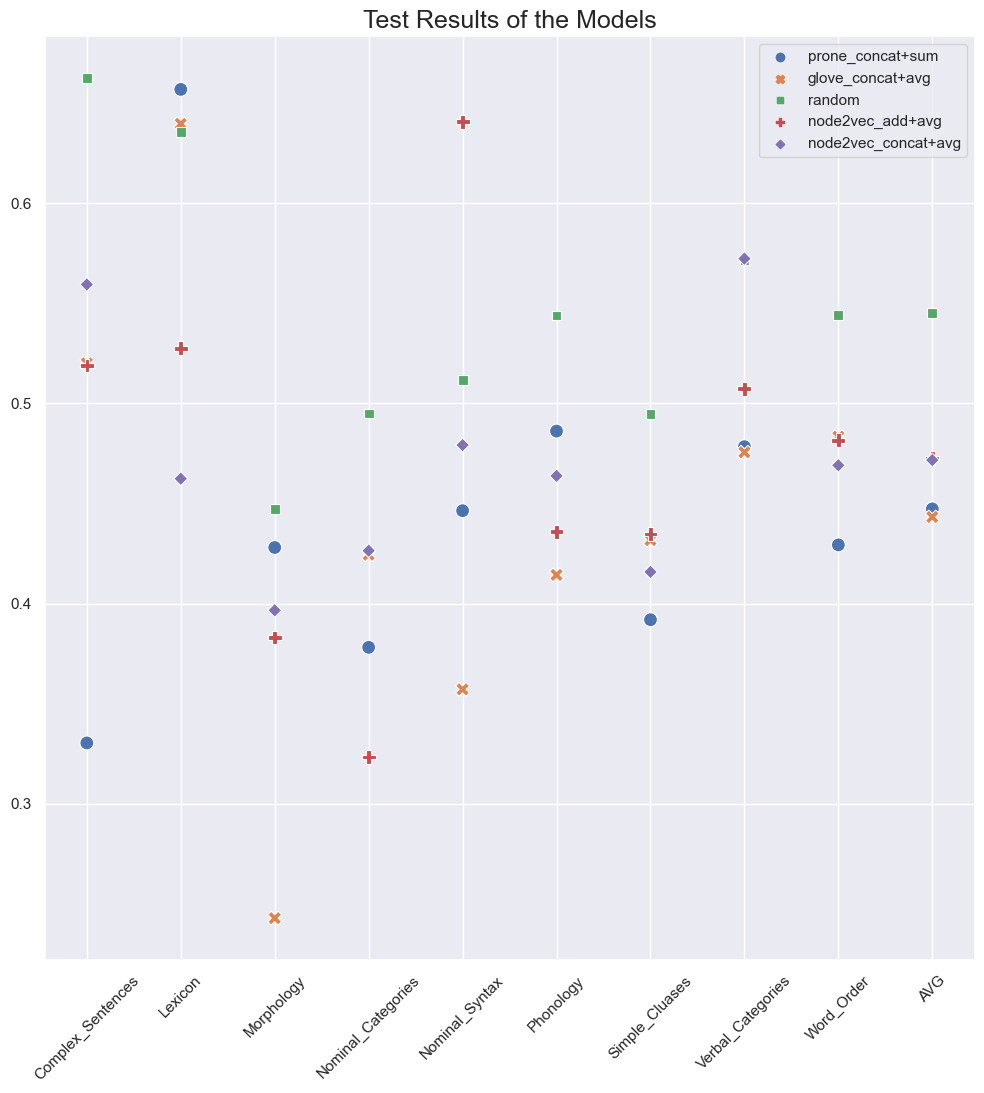

In [128]:
plt.figure(figsize=(12, 12))
plt.title(f"Test Results of the Models", fontsize=18)
# plt.yscale("log")
plt.xticks(rotation=45)
sns.scatterplot(data=df1[models], s=100)

In [51]:
df1

Model,clics_ggvc_concat+max,clics_glove_concat+avg,clics_glove_add+sum,clics_ggvc_concat+avg,clics_glove_concat+sum,clics_ggvc_add+avg,clics_ggvc_add+max,clics_ggvc_add+sum,clics_prone_add+sum,clics_node2vec_add+sum,...,clics_ggvc_concat+sum,clics_prone_concat+max,clics_prone_concat+avg,clics_glove_add+avg,clics_prone_add+max,clics_prone_concat+sum,clics_node2vec_add+avg,clics_glove_add+max,clics_node2vec_add+max,clics_node2vec_concat+max
Complex_Sentences,0.5184,0.5201,0.5357,0.4946,0.3956,0.6048,0.5827,0.5844,0.4422,0.4082,...,0.3952,0.4653,0.3915,0.4929,0.4997,0.3303,0.519,0.4946,0.5653,0.5677
Lexicon,0.4354,0.6398,0.539,0.4127,0.4519,0.51,0.5026,0.5069,0.517,0.6122,...,0.5153,0.4259,0.4803,0.3739,0.4232,0.657,0.5276,0.5096,0.5541,0.376
Morphology,0.3781,0.2427,0.3581,0.4431,0.3108,0.4512,0.399,0.3226,0.3359,0.4005,...,0.3208,0.2769,0.3583,0.4689,0.3755,0.428,0.383,0.4214,0.3337,0.3399
Nominal_Categories,0.3258,0.4244,0.397,0.3507,0.3443,0.3835,0.4103,0.3487,0.3672,0.3359,...,0.3379,0.3348,0.4395,0.3842,0.3392,0.3781,0.3233,0.3879,0.378,0.3778
Nominal_Syntax,0.4446,0.3571,0.6054,0.4134,0.4068,0.6051,0.4759,0.5071,0.4196,0.4792,...,0.3232,0.6113,0.5464,0.5286,0.4631,0.4464,0.6408,0.397,0.5464,0.5923
Phonology,0.4545,0.4143,0.4764,0.433,0.457,0.4378,0.5152,0.4344,0.4733,0.4305,...,0.407,0.5104,0.4542,0.5019,0.4727,0.4862,0.4359,0.479,0.4911,0.4543
Simple_Cluases,0.4062,0.4317,0.3705,0.4354,0.3606,0.4391,0.4,0.3701,0.3364,0.3937,...,0.3473,0.4283,0.4063,0.4197,0.4244,0.3919,0.4347,0.3496,0.3995,0.4029
Verbal_Categories,0.4034,0.4756,0.468,0.4683,0.4667,0.4848,0.5169,0.4425,0.4673,0.4678,...,0.4715,0.4111,0.4875,0.4821,0.5115,0.4784,0.5074,0.5324,0.4787,0.4729
Word_Order,0.487,0.4834,0.4336,0.4906,0.4648,0.5329,0.5197,0.4345,0.4811,0.4333,...,0.4121,0.482,0.4568,0.4937,0.4893,0.4293,0.4816,0.5108,0.4693,0.4733
AVG,0.428156,0.443233,0.464856,0.437978,0.4065,0.494356,0.480256,0.439022,0.426667,0.440144,...,0.392256,0.438444,0.446756,0.460656,0.444289,0.447289,0.472589,0.453589,0.468456,0.450789


<AxesSubplot: >

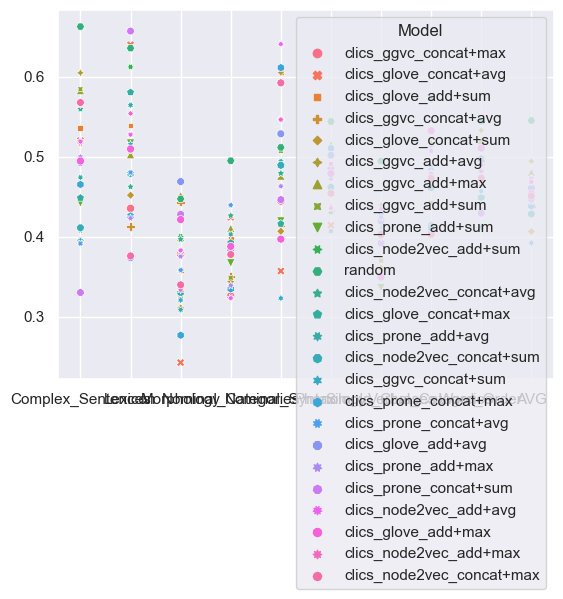

In [52]:
sns.scatterplot(data=df1)

In [129]:
df_test_zs

,Model,NodeEmb,Metric,Complex_Sentences,Lexicon,Morphology,Nominal_Categories,Nominal_Syntax,Simple_Cluases,Verbal_Categories,Word_Order,AVG
19,clics_prone_concat+sum,prone,concat+sum,0.475,0.8333,0.4333,0.3504,0.2333,0.7,0.6312,0.2143,0.483850
1,clics_glove_concat+avg,glove,concat+avg,0.475,0.8333,0.1500,0.3444,0.0667,0.6,0.5125,0.1071,0.386125
8,clics_prone_add+sum,prone,add+sum,0.450,0.6667,0.3500,0.3294,0.0667,0.2,0.3500,0.3571,0.346238
14,clics_ggvc_concat+sum,ggvc,concat+sum,0.250,0.5000,0.2556,0.3365,0.0667,0.3,0.4812,0.1429,0.291612
2,clics_glove_add+sum,glove,add+sum,0.475,0.5000,0.3222,0.2627,0.5333,0.1,0.3875,0.0714,0.331513
5,clics_ggvc_add+avg,ggvc,add+avg,0.600,0.5000,0.5528,0.2183,0.5611,0.8,0.4188,0.4286,0.509950
9,clics_node2vec_add+sum,node2vec,add+sum,0.450,0.5000,0.4000,0.1937,0.3111,0.6,0.4688,0.1071,0.378837
11,clics_glove_concat+max,glove,concat+max,0.225,0.5000,0.3222,0.3310,0.1333,0.6,0.3875,0.2143,0.339163
7,clics_ggvc_add+sum,ggvc,add+sum,0.550,0.3333,0.2194,0.2560,0.3667,0.3,0.4188,0.1071,0.318912
13,clics_node2vec_concat+sum,node2vec,concat+sum,0.325,0.3333,0.2472,0.4175,0.2000,0.1,0.4688,0.1429,0.279338


In [ ]:
plt.figure(figsize=(12, 12))
        plt.title(f"Divergence Score of Feature {feature}", fontsize=18)
        plt.yscale("log")
        plt.xticks(rotation=45)

        # kg.set_title(f"Divergence Score of Feature {feature}")
        kg = sns.scatterplot(data=group, x="Dataset", y="Divergence", hue="Model")

        fig = kg.get_figure()

        if colex_only:
            fig.savefig(os.path.join(outputfolder, "divergence", "comparing_colex_metrics", f"{feature}_div.png"))
        else:
            fig.savefig(os.path.join(outputfolder, "divergence", f"{feature}_div.png"))
        plt.clf()